In [1]:
include("preload.jl")
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "")
unshift!(PyVector(pyimport("sys")["path"]), "..")
@pyimport python2juliaReuse as p2j
include("preload.jl")
pc = p2j.PolicyContainer()
using Distributions

2018-08-31 13:26:52.819990: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2018-08-31 13:26:52.820006: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2018-08-31 13:26:52.820009: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2018-08-31 13:26:52.820012: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use FMA instructions, but these are available on your machine and could speed up CPU computations.


In [2]:
unshift!(PyVector(pyimport("sys")["path"]), "../Ad05RTheta1RSteer05Abs0FR200")
pc[:reset_policy](policy_path="Data/Ad05RTheta1RSteer05Abs0FR200/Policy/fsp_sample_4e2.pkl")

In [3]:
function handle_action!(scene,models,roadway,text;reverse=false)
    state = get_observation(scene,models,roadway)

    action1_arr = pc[:getAction](state,1)
    action1_arr = tanh.(action1_arr)
    
#     dacc = rand(pareto)-2.0
#     dsteer = rand(pareto)-2.0
#     if reverse
#         dacc = -dacc
#         dsteer = -dsteer
#     end
    dacc = 0.0
    dsteer = 0.0
    
    action = Egoaction(action1_arr[1],action1_arr[2],dacc,dsteer)
    bump,fail = simulate_action!(action,scene,models,roadway)
    reward = reward_fn(action,fail,scene,models,roadway)
    if bump
        rand_ego!(scene,models,roadway)
        pc[:resetPolicy](1)
    end
    state = get_observation(scene,models,roadway)
    empty!(text)
    push!(text,string("speed: ",scene[1].state.v))
    render(scene,roadway,models,text=text,cam=CarFollowCamera{Int}(1, 10.0))
end

handle_action! (generic function with 1 method)

In [4]:
function drawsim(t,dt=NaN)
    handle_action!(scene,models,roadway,text,reverse=true)
end

drawsim (generic function with 2 methods)

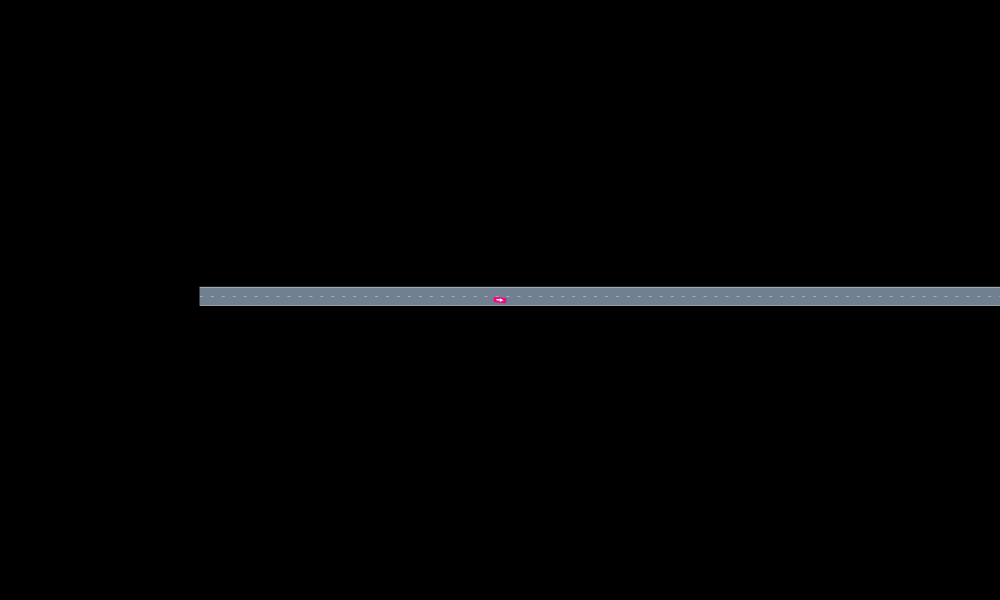

In [5]:
scene, models, roadway = initialize_env()
text = ["Nothing"]
pc[:resetPolicy](1)
pareto=Pareto(1.0,1)
rand_ego!(scene,models,roadway)
render(scene,roadway)

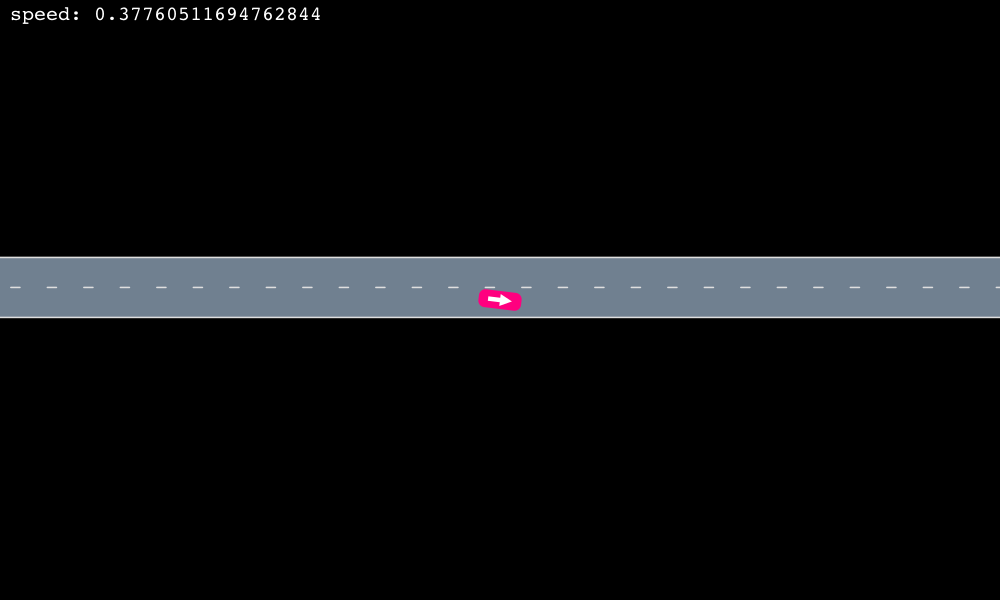

In [6]:
drawsim(0.0)

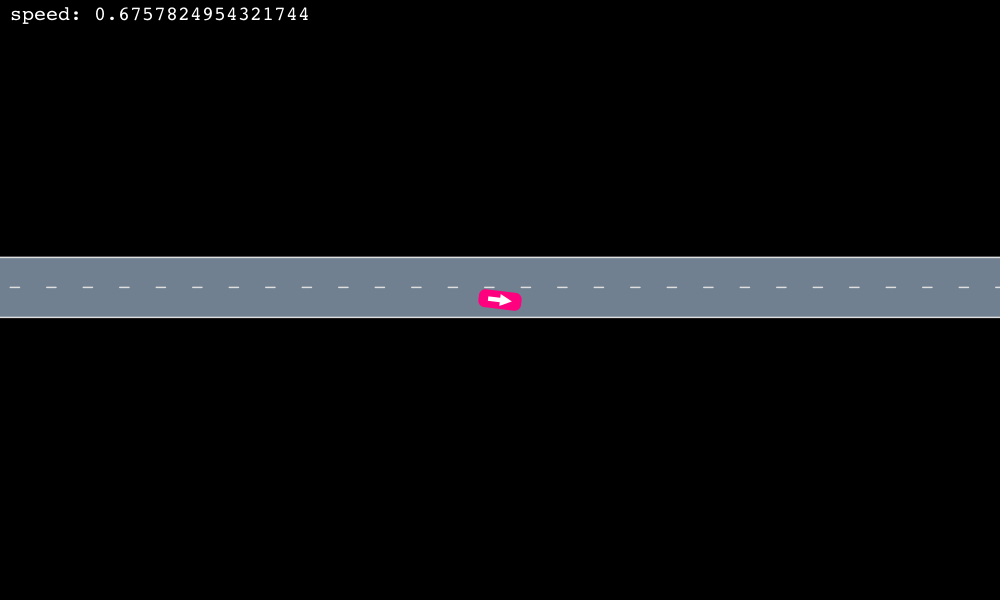

In [7]:
framerate = 20
ticks = fps(framerate)
timestamps = map(_ -> time(), ticks)
map(drawsim,timestamps)

In [ ]:
using Reel
framerate = 24

film = roll(drawsim, fps=framerate, duration=30)
write("Data/White/TanhEnv/Data/GIF/fsp15e3_pareto1_reverse.gif", film) # Write to a gif file